# 2019 Data analytics Lab - week 10
## Dimension reduction and Clustering

### Contents
#### Dimension reduction
- Feature extraction
- Visualization

#### Clustering
- k-Means
- Hierarchical clustering
- DBSCAN

### Used library
 - SQL Alchemy: DB와 관련된 다양한 작업을 지원하는 라이브러리 (https://www.sqlalchemy.org/)
 - Pandas: 데이터분석용 툴킷, Table 형태로 데이터를 다룰 수 있고 빨라서 널리사용됨 (https://pandas.pydata.org) 
 - Sci-kit learn: Machine learning과 관련된 대부분의 모듈이 구축되어 있음 (http://scikit-learn.org)
 - Matplotlib: Plot을 그릴때 가장 널리 사용되는 라이브러리 (https://matplotlib.org/)
 - Scipy
 
### Data
- 개인과제로 제공된 특허데이터 중에서, 초록 100개를 무작위 추출하여 사용함  
- Pandas를 이용하면 csv, xls 등의 파일을 읽을 수 도 있고, sql로부터 자료를 직접 가져올 수도 있음
- 본 예제에서는 sql에서 직접 가져옴
- Sci-kit learn의 CountVectorizer를 이용하여 Document-Term matrix로 변환하여 이용 (지난 lab 참조)

In [1]:
import pandas as pd
import sqlalchemy
import pymysql
pymysql.install_as_MySQLdb()

conn = sqlalchemy.create_engine('mysql://your id:your pw@address:port/scheme', encoding='utf-8')

query = "SELECT * FROM abstract ORDER BY rand() LIMIT 100"
data = pd.read_sql(sql=query, con=conn)
data.columns = ['app_num','abst']

C:\Users\user\Anaconda3\envs\main\lib\site-packages\pymysql\cursors.py:170: Warning: (1366, "Incorrect string value: '\\xB4\\xEB\\xC7\\xD1\\xB9\\xCE...' for column 'VARIABLE_VALUE' at row 533")
  result = self._query(query)


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

sample_corpus = data.abst.values.tolist()

vectorizer = CountVectorizer(stop_words='english',min_df=4, max_df=len(sample_corpus)*0.9)
TFM = vectorizer.fit_transform(sample_corpus)

print(vectorizer.get_feature_names()[0:10])
print(TFM.toarray()[0:10])
print(TFM.shape)

['according', 'additionally', 'angle', 'apparatus', 'applied', 'assembly', 'associated', 'axis', 'based', 'block']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 1 ... 0 0 0]]
(100, 157)


### Dimension reduction
#### Principal component analysis 
- Numpy, Scipy 등에서도 고유값 분해는 지원함
- 다만 기본적인 고유값 분해라서, 공분산행렬로 변환하고 넣어야 함 (PCA: 공분산에 대한 고유값 분해)
- 반면 Sci-kit learn에서는 공분산행렬 변환을 포함하여, 차원축소를 위한 다양한 편의기능을 제공하므로 추천함 (결과는 같음)

In [3]:
# pca sklearn
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(TFM.toarray())

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
# 고유값행렬의 주대각 성분
print('num of pca.singular_values_: {}'.format(len(pca.singular_values_)))
print(pca.singular_values_)

num of pca.singular_values_: 100
[2.91094704e+01 2.33764118e+01 2.22538207e+01 2.06876698e+01
 1.95741159e+01 1.92427809e+01 1.82299517e+01 1.74582684e+01
 1.70911039e+01 1.67953723e+01 1.64034686e+01 1.54879002e+01
 1.49638084e+01 1.45449075e+01 1.44771495e+01 1.42318747e+01
 1.37728744e+01 1.30772729e+01 1.20847643e+01 1.20721861e+01
 1.17231186e+01 1.11887776e+01 1.08591475e+01 1.06812025e+01
 1.00678150e+01 9.92677855e+00 9.73944701e+00 9.59723534e+00
 9.27088792e+00 9.16120076e+00 8.78287630e+00 8.40855802e+00
 8.03697202e+00 7.81512762e+00 7.60820858e+00 7.43502923e+00
 7.24099646e+00 7.06621016e+00 7.01178847e+00 6.80047231e+00
 6.68059751e+00 6.46099376e+00 6.38661642e+00 6.31964206e+00
 6.18274200e+00 6.12501622e+00 5.94045420e+00 5.78019367e+00
 5.70512500e+00 5.60824449e+00 5.42365243e+00 5.25616695e+00
 5.11427574e+00 5.03019612e+00 4.89494230e+00 4.75351422e+00
 4.68881642e+00 4.60182704e+00 4.51483193e+00 4.44202813e+00
 4.31419909e+00 4.26297492e+00 4.21949284e+00 4.0920

In [5]:
print("pca.components_ shape: {}".format(pca.components_.shape))
print(pca.components_)

pca.components_ shape: (100, 157)
[[ 8.00965495e-03  6.44910903e-03  1.42722047e-02 ... -1.19161553e-02
  -3.89741532e-03 -2.50903559e-02]
 [-2.62808155e-02 -8.32074269e-03  6.44095208e-03 ... -3.62043135e-04
   1.22885744e-02  1.22274421e-01]
 [-3.51357104e-02 -1.07775389e-02  3.11291296e-02 ... -4.03668961e-03
   2.44382839e-02 -4.43616175e-02]
 ...
 [ 1.67247487e-02  8.26353884e-02  1.45728033e-02 ... -1.55814374e-01
  -1.91189998e-02 -7.45153232e-03]
 [-4.63767350e-02 -1.24193070e-01  7.81345152e-02 ... -3.83057045e-01
   2.85508513e-02 -5.53683973e-02]
 [-9.05231942e-02  3.20459229e-01  1.25516268e-01 ... -1.07581639e-02
   1.05646168e-01  7.88887218e-02]]


In [6]:
print(pca.explained_variance_[0:10])  
print(pca.explained_variance_ratio_[0:10])

[8.55920469 5.5197639  5.00234887 4.3230271  3.87016173 3.74024865
 3.35688018 3.07869835 2.95056397 2.8493387 ]
[0.09578199 0.06176906 0.05597891 0.04837694 0.04330914 0.04185535
 0.03756525 0.03445225 0.03301836 0.0318856 ]


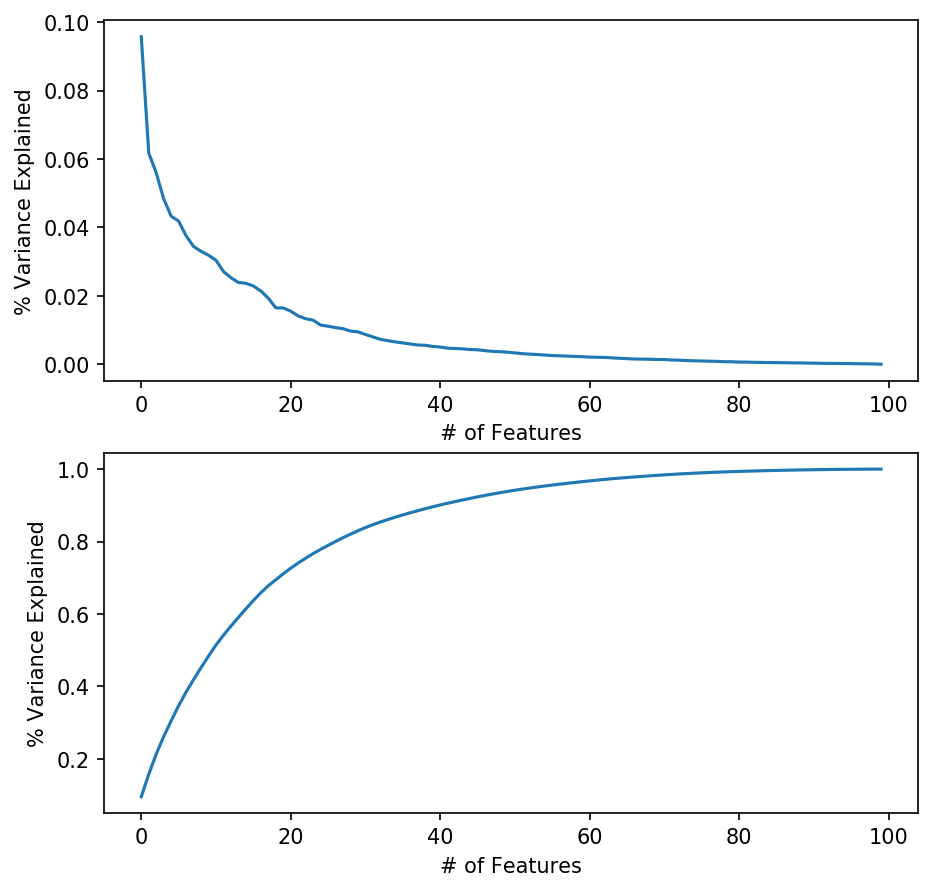

In [8]:
#scree graph
import matplotlib.pylab as plt
import numpy as np
var=np.cumsum(pca.explained_variance_ratio_)

plt.figure(dpi=150, figsize=(7,7))
plt.subplot(2, 1, 1)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')

plt.subplot(2, 1, 2)
plt.plot(var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')

plt.show()

In [9]:
print(np.sum(pca.explained_variance_ratio_[0:30]))  
print(np.sum(pca.explained_variance_ratio_[0:31]))  

0.829928271607572
0.8386477156646984


In [10]:
pca08 = PCA(n_components=0.8)

pca08.fit(TFM.toarray())
print('num of pca.singular_values_: {}'.format(len(pca08.singular_values_)))
print(pca08.singular_values_)
print("pca.components_ shape: {}".format(pca08.components_.shape))
print(pca08.components_)

num of pca.singular_values_: 27
[29.10947036 23.37641175 22.25382075 20.68766983 19.57411585 19.24278089
 18.22995168 17.45826842 17.09110392 16.79537232 16.40346862 15.48790016
 14.96380836 14.54490755 14.47714955 14.23187467 13.77287436 13.07727288
 12.08476435 12.07218612 11.7231186  11.18877757 10.8591475  10.68120247
 10.06781495  9.92677855  9.73944701]
pca.components_ shape: (27, 157)
[[ 0.00800965  0.00644911  0.0142722  ... -0.01191616 -0.00389742
  -0.02509036]
 [-0.02628082 -0.00832074  0.00644095 ... -0.00036204  0.01228857
   0.12227442]
 [-0.03513571 -0.01077754  0.03112913 ... -0.00403669  0.02443828
  -0.04436162]
 ...
 [-0.07737164  0.00525648  0.03816269 ... -0.00296908  0.00057624
   0.12723086]
 [ 0.02713435 -0.0197065   0.02308753 ... -0.02397598  0.08414516
  -0.14187275]
 [ 0.01164864  0.01700707 -0.02398424 ...  0.02404892 -0.02848458
  -0.15023553]]


In [11]:
# 새로운 데이터로 차원 축소하는 방법
new_dimension = pca08.transform(TFM.toarray())

* Sci-kit learn의 모듈들은 기본적으로 fit, transform, fit_transform 세가지 함수를 내장하고 있음
* fit은 모델을 데이터에 적합하는 함수, transform은 fit된 모델을 이용하여 다른 데이터를 변환하는 함수, fit_transform은 두가지를 한번에 실시하는 함수임

#### Singuar value decomposition
- PCA와 마찬가지로, Numpy 및 sci-kit learn 모두 지원함
- PCA는 변수의 차원축소에 많이 사용되기 때문에 Sklearn으로 소개하였음
- 반면 SVD는 행렬 분해 및 축소에 많이 사용되기 때문에 보다 직관적인 Numpy를 이용하여 설명함
- (사실 Sklearn의 PCA는 SVD기반으로 구현되어있긴 함)

In [12]:
from numpy.linalg import svd

u, s, v = svd(TFM.toarray())
print((u.shape, s.shape, v.shape))
reconstruct = np.dot(np.dot(u[:, 0:5], np.diag(s[0:5])), v[0:5,:])
print(reconstruct)

((100, 100), (100,), (157, 157))
[[ 0.00961136  0.00373273  0.00235158 ...  0.00442597  0.00601552
   0.03436816]
 [ 0.07451408  0.03654571  0.10771973 ...  0.06951193  0.23532315
   0.93652938]
 [ 0.04093189  0.01860818  0.03466164 ...  0.00369254  0.03999935
   0.04937603]
 ...
 [ 0.04220933  0.02538171  0.09933742 ...  0.03210347  0.09670452
   0.29842589]
 [ 0.23987561  0.10504447  0.1164937  ...  0.00366973  0.0131796
  -0.18072036]
 [ 0.03047748  0.01218551  0.00933058 ...  0.00661027  0.02053338
   0.06755011]]


##### Visual example of SVD

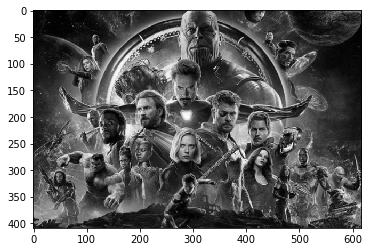

In [13]:
from PIL import Image

img = Image.open('./sample_endgame.jpg')
img_gray = img.convert('LA')
img_mat = np.array(img_gray)[:,:,0]

plt.figure()
fig_ori = plt.imshow(img_mat, cmap='gray')

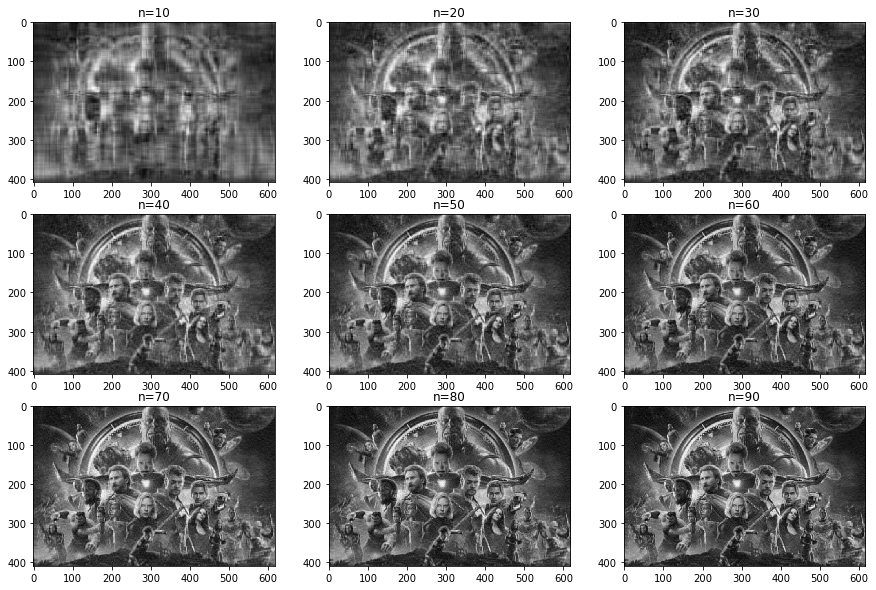

In [14]:
U, S, V = svd(img_mat)
size_mat = {'full':U.nbytes+S.nbytes+V.nbytes}
step = 10

plt.figure(figsize=(15,10))
for i in range(1, 10):
    reconst_img = np.dot(np.dot(U[:, 0:i*step], np.diag(S[0:i*step])), V[0:i*step,:])
    size_mat[i*step] = U[:, 0:i*step].nbytes+S[0:i*step].nbytes+V[0:i*step,:].nbytes
    plt.subplot("33{}".format(i))
    fig = plt.imshow(reconst_img, cmap='gray')
    plt.title('n={}'.format(i*step))
plt.show()

In [15]:
for key in size_mat.keys():
    print('bytes of U+S+V (n={}): {} ({}%)'.format(key, size_mat[key], np.round(100*size_mat[key]/size_mat['full'], 2)))

bytes of U+S+V (n=full): 4387032 (100.0%)
bytes of U+S+V (n=10): 82160 (1.87%)
bytes of U+S+V (n=20): 164320 (3.75%)
bytes of U+S+V (n=30): 246480 (5.62%)
bytes of U+S+V (n=40): 328640 (7.49%)
bytes of U+S+V (n=50): 410800 (9.36%)
bytes of U+S+V (n=60): 492960 (11.24%)
bytes of U+S+V (n=70): 575120 (13.11%)
bytes of U+S+V (n=80): 657280 (14.98%)
bytes of U+S+V (n=90): 739440 (16.86%)


#### Non-negative matrix factorization
- Non-negative matrix factorization(NNMF)의 경우 N\*d 행렬을 N\*k, k\*d로 분해하는 것은 기존의 Matrix factorization과 같음
- 그러나 NNMF는 분해되는 두 행렬의 값을 음수가 아닌 값으로 분해한다는 특징이 있음
- Analytical한 정답이 나오지는 않으며 주어진 조건에 최적화된 값을 산출함
- Recommendation system이나 Topic modeling등에 기본 알고리즘으로 널리 사용됨

일반적인 목적함수는 다음과 같음:  
  0.5 * ||X - WH||_Fro^2 + alpha * l1_ratio * ||vec(W)||_1 + alpha * l1_ratio * ||vec(H)||_1 + 0.5 * alpha * (1 - l1_ratio) * ||W||_Fro^2 + 0.5 * alpha * (1 - l1_ratio) * ||H||_Fro^2     

Where:  
  ||A||_Fro^2 = \sum_{i,j} A_{ij}^2 (Frobenius norm)  
||vec(A)||_1 = \sum_{i,j} abs(A_{ij}) (Elementwise L1 norm)

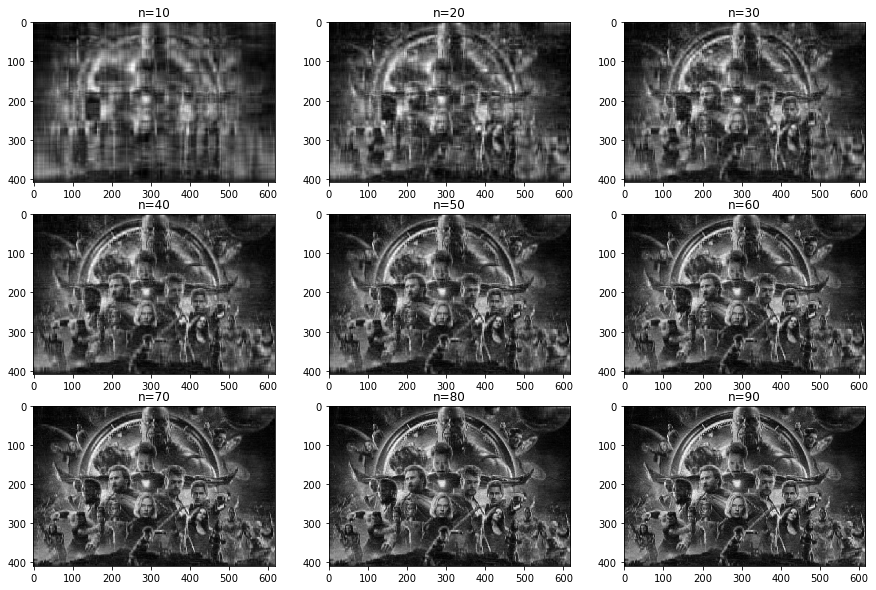

In [16]:
from sklearn.decomposition import NMF

size_nmf = {}
plt.figure(figsize=(15,10))
for i in range(1, 10):
    nmf_img = NMF(n_components=i*step)
    left = nmf_img.fit_transform(img_mat)
    right = nmf_img.components_
    size_nmf[i*step] = left.nbytes+right.nbytes
    
    plt.subplot("33{}".format(i))
    fig = plt.imshow(np.dot(left,right), cmap='gray')
    plt.title('n={}'.format(i*step))
plt.show()

In [17]:
# %값은 원래 full SVD대비 용량
for key in size_nmf.keys():
    print('bytes of left+right (n={}): {} ({}%)'.format(key, size_nmf[key], np.round(100*size_nmf[key]/size_mat['full'], 2)))

bytes of left+right (n=10): 82080 (1.87%)
bytes of left+right (n=20): 164160 (3.74%)
bytes of left+right (n=30): 246240 (5.61%)
bytes of left+right (n=40): 328320 (7.48%)
bytes of left+right (n=50): 410400 (9.35%)
bytes of left+right (n=60): 492480 (11.23%)
bytes of left+right (n=70): 574560 (13.1%)
bytes of left+right (n=80): 656640 (14.97%)
bytes of left+right (n=90): 738720 (16.84%)


### Topic Modeling
#### Latent semantic indexing (LSI)
- SVD를 이용하여 Document-Term matrix를 분해하면 이를 LSI(또는 LSA;Latent semantic analysis)라고 함
- X=U\*S\*V^T라고 할 때, Document-topic matrix = U\*S, Topic-term matrix = S\*V^T로 표현됨 

In [18]:
u,s,vT = np.linalg.svd(TFM.toarray())
DocTopic = pd.DataFrame(np.dot(u[:,0:10],np.diag(s[0:10])), columns = ["Topic #{}".format(i) for i in range(10)])
TopicTerm = pd.DataFrame(np.dot(np.diag(s[0:10]), vT[0:10,:]), columns=vectorizer.get_feature_names())
for row in range(len(TopicTerm)):
    temp = TopicTerm.iloc[row].sort_values(ascending=False)[0:10]
    print("Topic #{}: ".format(row)+", ".join(temp.index.values))

Topic #0: said, limited, multiple, substantially, stored, low, various, particularly, techniques, thereof
Topic #1: layer, second, member, surface, layers, magnetic, substrate, direction, respective, portion
Topic #2: layer, plurality, magnetic, provided, device, pressure, data, layers, film, method
Topic #3: member, element, includes, surface, portion, relative, assembly, members, body, structure
Topic #4: data, signal, second, member, receiver, surface, body, generating, method, edge
Topic #5: chamber, gas, data, device, second, having, engine, portion, magnetic, signal
Topic #6: unit, image, frame, object, display, second, data, motion, current, based
Topic #7: second, unit, magnetic, portion, display, signal, element, core, layers, control
Topic #8: device, unit, motion, module, frame, image, information, object, display, gas
Topic #9: module, pressure, plurality, valve, configured, signal, optical, surface, output, apparatus


- Sci-kit learn에도 구현되어 있음
- Sklearn은 SVD를 구하는 알고리즘이 달라서, 약간 결과가 다를 수 있음
- 대량의 데이터 처리를 위해 더 빠르고 효율적인 알고리즘을 가지고 있음

In [19]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=5, random_state=None, tol=0.0)
svd.fit(TFM)

print("\nTopics in SVD(LSA) model:")
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(svd.components_):
    message = "Topic #%d: " % topic_idx
    message += ", ".join([feature_names[i] for i in topic.argsort()[:-10 -1:-1]])
    print(message)


Topics in SVD(LSA) model:
Topic #0: second, layer, includes, circuit, member, block, plurality, surface, portion, element
Topic #1: signal, device, data, flow, control, output, target, voltage, based, value
Topic #2: circuit, block, member, second, portion, test, element, set, configured, relative
Topic #3: circuit, block, layer, test, configured, set, control, form, magnetic, information
Topic #4: chamber, target, gas, flow, element, valve, pressure, value, current, voltage
Topic #5: chamber, gas, data, device, second, having, engine, portion, magnetic, signal
Topic #6: unit, image, frame, object, display, second, data, motion, current, based
Topic #7: includes, motion, method, surface, member, block, information, circuit, based, assembly
Topic #8: pressure, valve, data, film, value, signal, second, voltage, electronic, element
Topic #9: module, pressure, plurality, valve, configured, optical, signal, surface, assembly, apparatus


- 일반적인 Matrix fatorizing으로 활용하기는 좋음
- Topic modeling으로써는 값이 음수인 경우 해석이 난해함 (-0.2만큼 관련이 없다?)
- 확률값의 형태로 변환하기 위해 Normalize를 실시할 경우 부호가 반대가 되면 토픽 해석이 잘못 될 수 있음 (기준 모호)

In [21]:
for row in range(len(TopicTerm)):
    temp = TopicTerm.iloc[row].sort_values(ascending=False)[0:10]
    print("Topic #{}: ".format(row)+", ".join(temp.index.values))
    print("Topic #{}: ".format(row)+", ".join(map(str, np.round(temp.values/np.sum(temp.values),4))))

Topic #0: said, limited, multiple, substantially, stored, low, various, particularly, techniques, thereof
Topic #0: 0.0662, 0.0793, 0.0798, 0.0897, 0.0928, 0.0967, 0.0995, 0.1123, 0.138, 0.1459
Topic #1: layer, second, member, surface, layers, magnetic, substrate, direction, respective, portion
Topic #1: 0.2948, 0.2595, 0.0809, 0.0776, 0.0696, 0.0554, 0.0534, 0.0378, 0.0359, 0.035
Topic #2: layer, plurality, magnetic, provided, device, pressure, data, layers, film, method
Topic #2: 0.413, 0.0933, 0.0799, 0.065, 0.0617, 0.0603, 0.0602, 0.0597, 0.0552, 0.0518
Topic #3: member, element, includes, surface, portion, relative, assembly, members, body, structure
Topic #3: 0.2894, 0.1486, 0.1283, 0.0905, 0.0719, 0.0638, 0.0584, 0.0518, 0.0503, 0.0468
Topic #4: data, signal, second, member, receiver, surface, body, generating, method, edge
Topic #4: 0.4137, 0.1519, 0.1131, 0.0745, 0.0462, 0.0441, 0.04, 0.0398, 0.0388, 0.0379
Topic #5: chamber, gas, data, device, second, having, engine, portion,

#### Non-negative matrix factorization
- Non-negative matrix factorization(NNMF)의 경우 N\*d 행렬을 N\*k, k\*d로 분해하는 것은 기존의 Matrix factorization과 같음
- 그러나 NNMF는 분해되는 두 행렬의 값을 음수가 아닌 값으로 분해한다는 특징이 있음
- 따라서 Topic modeling에 적합함

In [22]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=10)
nmf.fit(TFM)

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(nmf.components_):
    message = "Topic #%d: " % topic_idx
    message += ", ".join([feature_names[i] for i in topic.argsort()[:-10 -1:-1]])
    print(message)


Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: circuit, block, second, test, configured, set, form, portion, control, includes
Topic #1: data, signal, based, device, method, generating, second, includes, voltage, edge
Topic #2: layer, second, plurality, magnetic, layers, respective, substrate, provided, surface, include
Topic #3: member, second, includes, portion, surface, element, relative, members, assembly, body
Topic #4: flow, target, element, value, voltage, corresponding, apparatus, structure, vehicle, valve
Topic #5: chamber, gas, device, having, disposed, engine, lower, positioned, coupled, portion
Topic #6: unit, image, display, object, frame, second, control, detection, current, target
Topic #7: motion, includes, method, information, determining, based, frame, assembly, substrate, user
Topic #8: pressure, valve, film, second, electronic, current, includes, value, control, provided
Topic #9: device, signal, module, output, configured, control, appara

In [23]:
print(nmf.fit_transform(TFM)[0:10])
print(nmf.components_)

[[0.00000000e+00 1.31000457e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.04264216e-01
  2.08728484e-03 1.94037381e-02]
 [1.51601210e-01 5.99170648e-03 0.00000000e+00 2.67007196e-02
  1.54466079e-01 4.76332723e-02 0.00000000e+00 1.60631357e-01
  4.03420157e-02 1.33213544e+00]
 [0.00000000e+00 0.00000000e+00 1.02681384e-01 7.46234950e-02
  0.00000000e+00 7.05506098e-03 0.00000000e+00 2.61600865e-01
  3.62464836e-02 2.75679602e-02]
 [0.00000000e+00 1.85907283e-01 0.00000000e+00 0.00000000e+00
  9.41204741e-04 6.56148395e-03 0.00000000e+00 6.12461253e-01
  0.00000000e+00 3.91554490e-02]
 [0.00000000e+00 1.24243415e-02 3.86813585e-01 0.00000000e+00
  4.57311336e-01 2.58677847e-02 0.00000000e+00 0.00000000e+00
  2.55821031e-03 1.24609900e-01]
 [7.95047548e-02 0.00000000e+00 0.00000000e+00 1.34886212e-01
  0.00000000e+00 0.00000000e+00 5.29154490e-02 0.00000000e+00
  3.86231029e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.68404358e-01 0.00000000e

##### Latent Dirichlet Allocation
- LDA는 최근 가장 널리 사용되는 알고리즘
- 문서에 대한 토픽분포와 토픽에 대한 단어분포를 모두 개별적인 다항분포로 고려함
- 다항분포의 결레분포인 디리클레분포를 사전분포로 설정하고 데이터를 기반으로 베이즈추론을 반복

In [24]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=777, verbose=0, learning_method='batch', max_iter=100)
lda.fit(TFM)

print("\nTopics in LDA model (Perplexity={}):".format(lda.perplexity(TFM)))
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    message = "Topic #%d: " % topic_idx
    message += ", ".join([feature_names[i] for i in topic.argsort()[:-10 -1:-1]])
    print(message)


Topics in LDA model (Perplexity=104.21332298817768):
Topic #0: core, magnetic, valve, element, second, pressure, structure, non, housing, metal
Topic #1: apparatus, flow, value, voltage, methods, output, element, input, target, high
Topic #2: information, device, unit, control, image, target, optical, apparatus, method, comprising
Topic #3: circuit, motion, block, device, includes, time, second, signal, output, set
Topic #4: module, device, current, target, unit, straps, value, motor, vehicle, computing
Topic #5: second, plurality, includes, include, configured, voltage, respective, data, object, edge
Topic #6: assembly, second, includes, layer, end, portion, substrate, elastic, member, drive
Topic #7: data, signal, user, based, receiver, device, plurality, component, described, associated
Topic #8: member, second, includes, element, surface, film, flow, portion, communication, pressure
Topic #9: layer, second, chamber, surface, gas, includes, substrate, invention, electronic, display

In [25]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, TFM, vectorizer)

C:\Users\user\Anaconda3\envs\main\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.162440  0.052607       1        1  12.921928
2      0.165805 -0.045868       2        1  11.994574
5      0.010363  0.148804       3        1  11.715892
6     -0.203013  0.002335       4        1  11.166900
7      0.195878  0.171078       5        1  10.803673
8     -0.192216  0.024431       6        1   9.419246
3      0.132963 -0.044786       7        1   9.293910
0     -0.123350 -0.128794       8        1   8.978462
1      0.058563  0.043237       9        1   7.106842
4      0.117447 -0.223044      10        1   6.598574, topic_info=    Category        Freq         Term       Total  loglift  logprob
28   Default   48.000000         data   48.000000  30.0000  30.0000
89   Default   24.000000       module   24.000000  29.0000  29.0000
84   Default   35.000000       member   35.000000  28.0000  28.0000
5    Default   31.000000     assembly   31.000000  27.0000  27.0000
34   Default   64.000000       device   64.000000  26.0000  26.0000
73   Default   63.000000        layer   63.000000  25.0000  25.0000
11   Default   24.000000      chamber   24.000000  24.0000  24.0000
132  Default   42.000000       signal   42.000000  23.0000  23.0000
68   Default   24.000000  information   24.000000  22.0000  22.0000
140  Default   38.000000      surface   38.000000  21.0000  21.0000
90   Default   19.000000       motion   19.000000  20.0000  20.0000
142  Default   28.000000       target   28.000000  19.0000  19.0000
9    Default   18.000000        block   18.000000  18.0000  18.0000
12   Default   32.000000      circuit   32.000000  17.0000  17.0000
45   Default   31.000000      element   31.000000  16.0000  16.0000
128  Default  116.000000       second  116.000000  15.0000  15.0000
147  Default   27.000000         unit   27.000000  14.0000  14.0000
54   Default   20.000000         flow   20.000000  13.0000  13.0000
80   Default   21.000000     magnetic   21.000000  12.0000  12.0000
24   Default   17.000000         core   17.000000  11.0000  11.0000
150  Default   20.000000         user   20.000000  10.0000  10.0000
109  Default   23.000000     pressure   23.000000   9.0000   9.0000
3    Default   29.000000    apparatus   29.000000   8.0000   8.0000
153  Default   16.000000        valve   16.000000   7.0000   7.0000
27   Default   17.000000      current   17.000000   6.0000   6.0000
152  Default   28.000000        value   28.000000   5.0000   5.0000
156  Default   18.000000      voltage   18.000000   4.0000   4.0000
58   Default   15.000000          gas   15.000000   3.0000   3.0000
139  Default   20.000000    substrate   20.000000   2.0000   2.0000
53   Default   15.000000         film   15.000000   1.0000   1.0000
..       ...         ...          ...         ...      ...      ...
18   Topic10    4.356048    computing    9.378560   1.9515  -3.6330
7    Topic10    3.838502         axis    8.467548   1.9272  -3.7594
59   Topic10    2.902341     generate    6.585032   1.8990  -4.0390
2    Topic10    3.013812        angle    8.439915   1.6885  -4.0013
22   Topic10    2.299842    connector    6.571776   1.6684  -4.2717
122  Topic10    3.838596       region   11.271231   1.6412  -3.7594
142  Topic10    9.456016       target   28.103480   1.6291  -2.8579
147  Topic10    8.436600         unit   27.287983   1.5444  -2.9719
130  Topic10    3.838551          set   13.203339   1.4829  -3.7594
154  Topic10    1.633613      various    6.545348   1.3304  -4.6137
34   Topic10   14.942468       device   64.988804   1.2483  -2.4003
152  Topic10    6.046768        value   28.010619   1.1853  -3.3050
106  Topic10    1.966108     position    9.397930   1.1539  -4.4285
44   Topic10    2.902248   electronic   16.021311   1.0099  -4.0390
129  Topic10    1.966105       sensor   12.267716   0.8874  -4.4285
75   Topic10    1.095813        level    7.525620   0.7915  -5.0130
55   Topic10    1.458760         form   10.37

### Another dimension reduction method for Visualization
데이터 시각화만을 위한 차원축소 방법들
 
 - t-distributed Stochastic Neighbor Embedding (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
 - Multidimensional scaling (https://en.wikipedia.org/wiki/Multidimensional_scaling)
 - Isomap (https://en.wikipedia.org/wiki/Isomap)
 - Locally Linear Embedding (https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Locally-linear_embedding)
 
더 알아보기: https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction

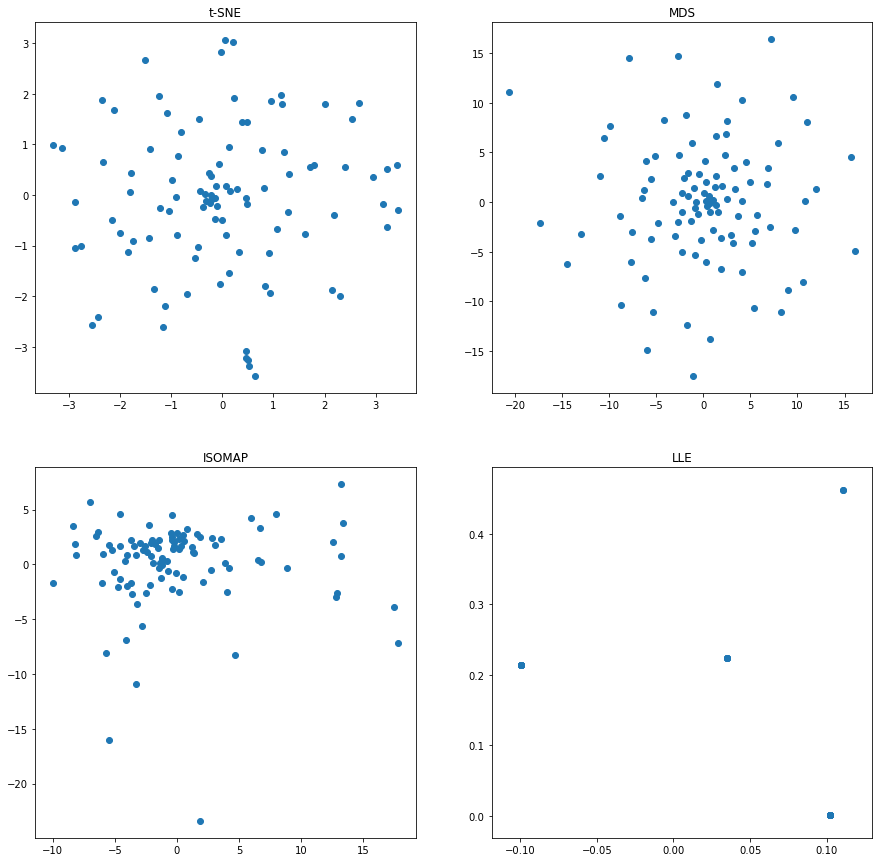

In [26]:
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding

tsne = TSNE(n_components=2, learning_rate=1.0, n_iter=1000).fit_transform(TFM.toarray())
mds = MDS(n_components=2, dissimilarity='euclidean').fit_transform(TFM.toarray())
isomap = Isomap(n_neighbors=10, n_components=2).fit_transform(TFM.toarray())
lle = LocallyLinearEmbedding(n_neighbors=1, n_components=2).fit_transform(TFM.toarray())

plt.figure(figsize=(15,15))

plt.subplot(221)
plt.title("t-SNE")
plt.scatter(tsne[:,0], tsne[:,1])

plt.subplot(222)
plt.title("MDS")
plt.scatter(mds[:,0], mds[:,1])

plt.subplot(223)
plt.title("ISOMAP")
plt.scatter(isomap[:,0], isomap[:,1])

plt.subplot(224)
plt.title("LLE")
plt.scatter(lle[:,0], lle[:,1])

plt.show()

### Clustering
#### Data for visual example

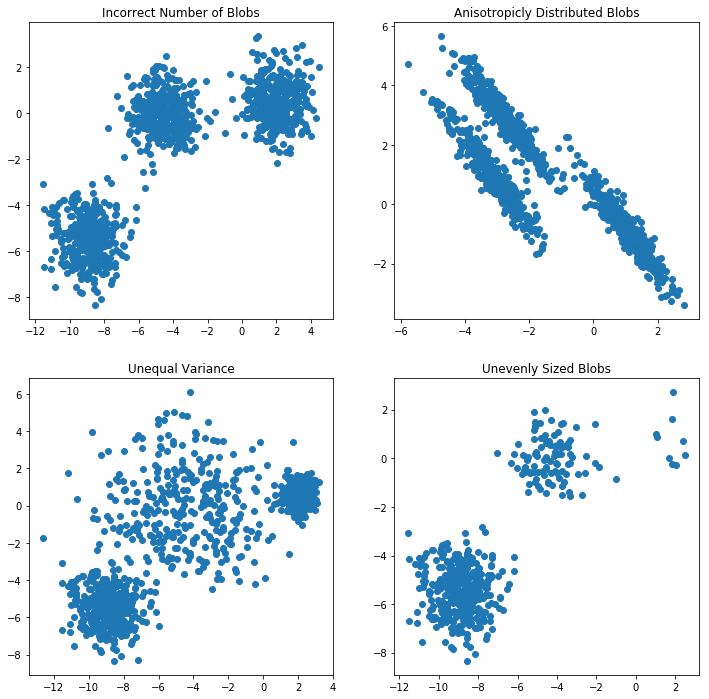

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

n_samples = 1000
random_state = 170

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))


plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Incorrect Number of Blobs")

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.title("Anisotropicly Distributed Blobs")

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1])
plt.title("Unequal Variance")

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1])
plt.title("Unevenly Sized Blobs")

plt.show()

#### k-Means
- 임의의 중심점을 k개 생성
- 각 데이터들은 거리가 가까운 중심점에 속하는 클러스터로 형성됨
- 중심점의 위치를 클러스터의 중심으로 이동
- 클러스터 재생성 후 중심점 위치 변경을 수렴할때까지 반복
- 간단하고 직관적이나, 이상치에 민감함

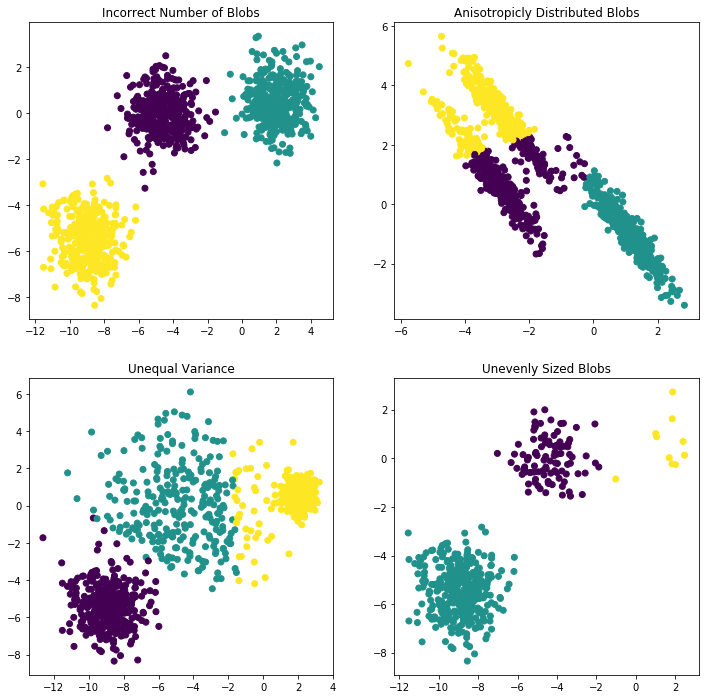

In [29]:
from sklearn.cluster import KMeans

# Incorrect number of clusters
y_pred_1 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)

# Anisotropicly distributed data
y_pred_2 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

# Different variance
y_pred_3 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

# Unevenly sized blobs
y_pred_4 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)

plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_1)
plt.title("Incorrect Number of Blobs")

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_2)
plt.title("Anisotropicly Distributed Blobs")

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_3)
plt.title("Unequal Variance")

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred_4)
plt.title("Unevenly Sized Blobs")

plt.show()

##### Scree graph for k-Means

In [30]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(TFM)
print(kmeans.labels_)
print(kmeans.transform(TFM.toarray()[0:10]))

[1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 0 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1]
[[ 7.34545292  3.7893766  23.76972865]
 [11.91451546  9.92896646 24.51530134]
 [ 9.02090524  7.15956528 24.57641145]
 [ 9.48727096  6.89814287 24.61706725]
 [14.03596488 12.63860653 26.88865932]
 [16.38863196 16.11937887 27.25802634]
 [ 9.05293757  7.89362876 24.75883681]
 [ 7.5816881   4.70737453 23.9582971 ]
 [ 9.40928403  7.26012224 24.12467616]
 [ 7.22990098  8.15379513 22.5166605 ]]


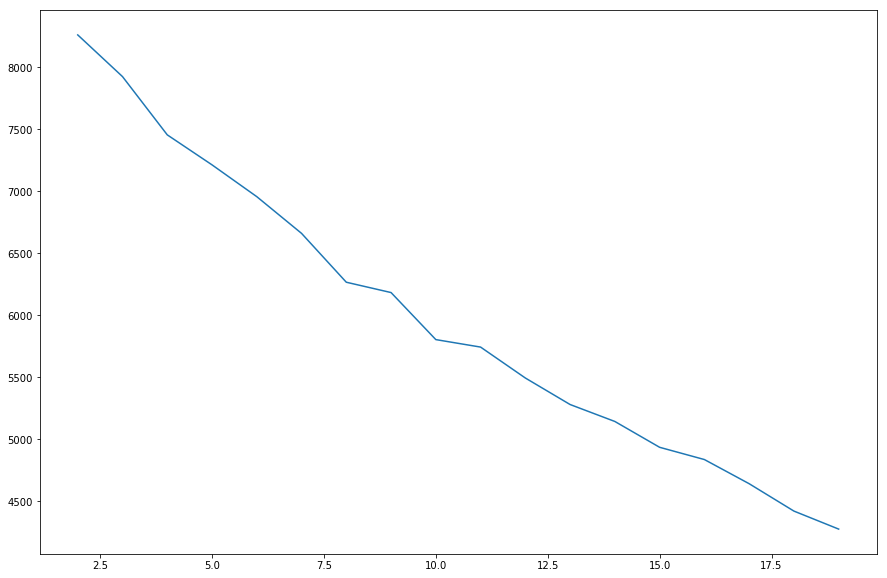

In [31]:
inertias = []
num_clusters = list(range(2,20))

for i in num_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(TFM)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(15,10))
plt.plot(num_clusters, inertias)
plt.show()

#### Hierarchical clustering
- 가장 가까운 데이터 또는 클러스터끼리 연결하는 과정 반복
- 클러스터의 수를 지정하지 않아도 됨
- 클러스터간의 거리를 지정하는 방법에 따라 다양한 variation이 존재

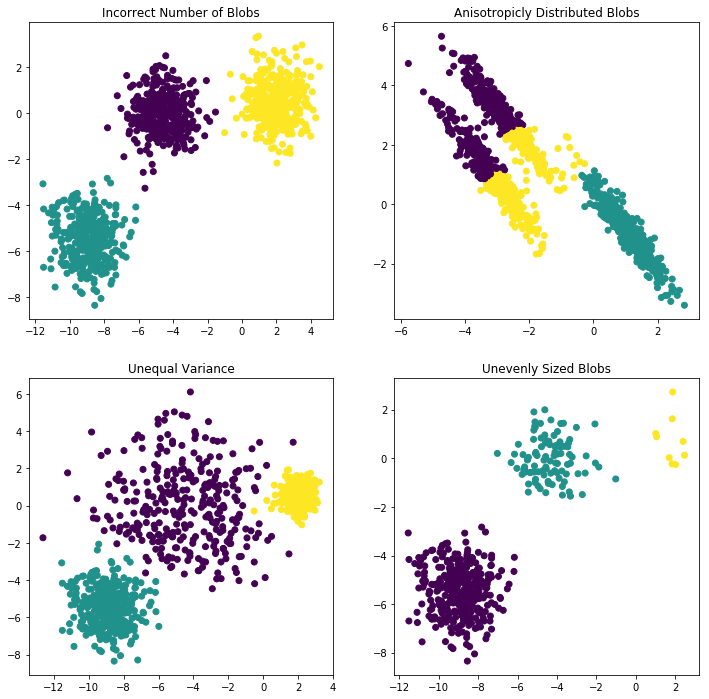

In [32]:
from sklearn.cluster import AgglomerativeClustering

# Incorrect number of clusters
y_pred_1 = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)

# Anisotropicly distributed data
y_pred_2 = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_aniso)

# Different variance
y_pred_3 = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_varied)

# Unevenly sized blobs
y_pred_4 = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_filtered)

plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_1.labels_)
plt.title("Incorrect Number of Blobs")
          
plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_2.labels_)
plt.title("Anisotropicly Distributed Blobs")
          
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_3.labels_)
plt.title("Unequal Variance")

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred_4.labels_)
plt.title("Unevenly Sized Blobs")

plt.show()

#### Dendrogram

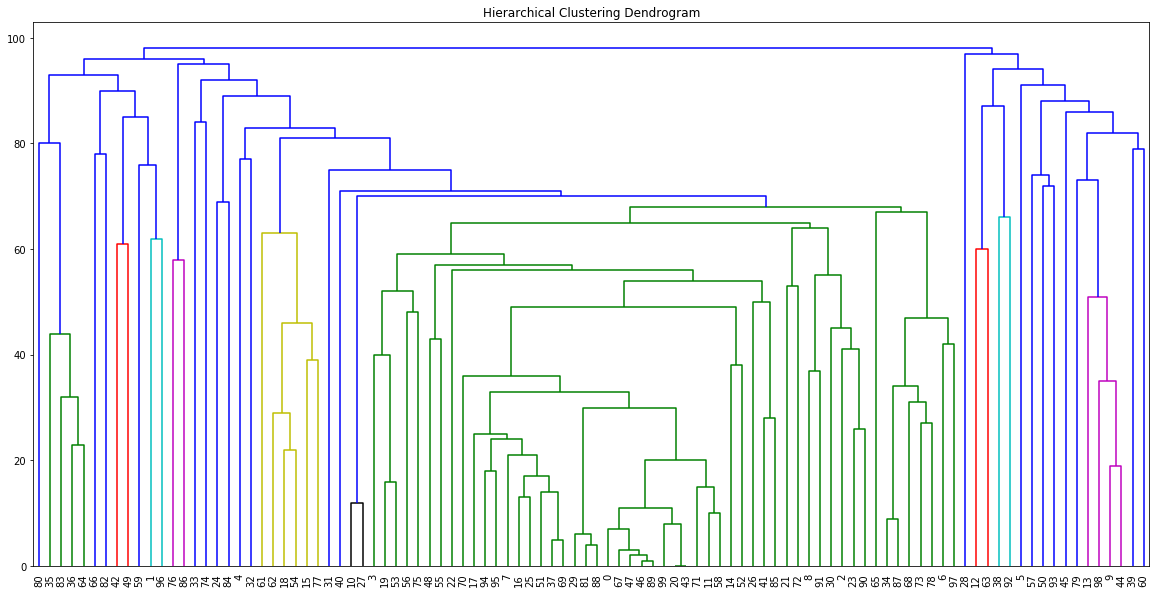

In [33]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering()

model = model.fit(TFM.toarray())
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, leaf_font_size=10)
plt.show()

In [34]:
# 애초에 랜덤으로 뽑은 데이터라...가장 비슷한 애들을 뽑아도 별로 비슷하지는 않음

print(data.loc[46, 'abst'])
print(TFM.toarray()[46])
print()
print(data.loc[89, 'abst'])
print(TFM.toarray()[89])

The invention provides processes for the manufacture of conductive transparent films and electronic or optoelectronic devices comprising same.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]

The invention relates to a process for converting polychlorosilanes into hexachlorodisilane, by one or more trimeric polychlorosilanes or a trimeric polychlorosilane in a mixture with higher molecular weight polychlorosilanes being exposed to a gas discharge and hexachlorodisilane being formed and isolated.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0

#### DBSCAN (Density-based spatial clustering of applications with noise)
- 대표적인 Non-parametric model중 하나
- 특정 공간(eps)안에 특정 개수(minPts) 이상의 데이터가 있으면 하나의 클러스터로 간주
- 특이한 형태의 데이터를 잘 클러스터링 하는것으로 알려짐

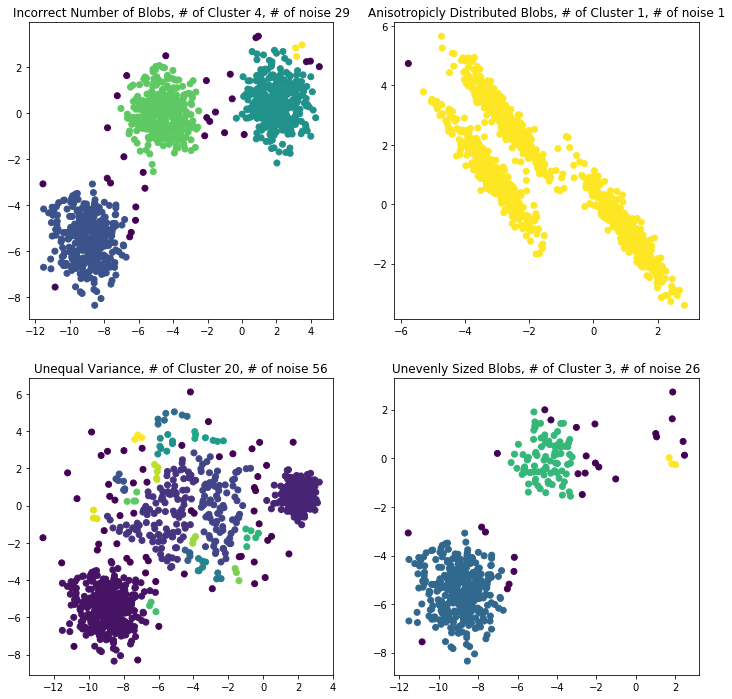

In [35]:
from sklearn.cluster import DBSCAN

# Incorrect number of clusters
y_pred_1 = DBSCAN(eps=0.5, min_samples=3).fit(X)

# Anisotropicly distributed data
y_pred_2 = DBSCAN(eps=0.5, min_samples=3).fit(X_aniso)

# Different variance
y_pred_3 = DBSCAN(eps=0.5, min_samples=3).fit(X_varied)

# Unevenly sized blobs
y_pred_4 = DBSCAN(eps=0.5, min_samples=3).fit(X_filtered)

plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred_1.labels_)
plt.title("Incorrect Number of Blobs, # of Cluster {}, # of noise {}".format(len(set(y_pred_1.labels_)) - (1 if -1 in y_pred_1.labels_ else 0),list(y_pred_1.labels_).count(-1)))

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_2.labels_)
plt.title("Anisotropicly Distributed Blobs, # of Cluster {}, # of noise {}".format(len(set(y_pred_2.labels_)) - (1 if -1 in y_pred_2.labels_ else 0),list(y_pred_2.labels_).count(-1)))

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_3.labels_)
plt.title("Unequal Variance, # of Cluster {}, # of noise {}".format(len(set(y_pred_3.labels_)) - (1 if -1 in y_pred_3.labels_ else 0),list(y_pred_3.labels_).count(-1)))

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred_4.labels_)
plt.title("Unevenly Sized Blobs, # of Cluster {}, # of noise {}".format(len(set(y_pred_4.labels_)) - (1 if -1 in y_pred_4.labels_ else 0),list(y_pred_4.labels_).count(-1)))

plt.show()

##### k-Distance graph to determine eps of DBSCAN
- minPts >=  Feature개수 +1 로 정하는게 일반적임
- eps를 결정하지 않는 형태인 OPTICS라는 알고리즘도 있음

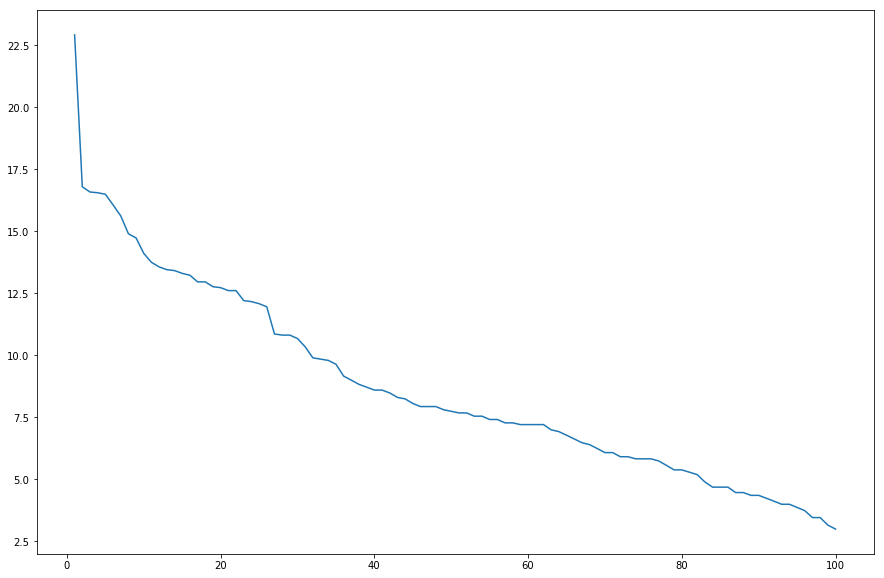

In [36]:
from sklearn.neighbors import NearestNeighbors

ns = 4
nbrs = NearestNeighbors(n_neighbors=ns).fit(TFM.toarray())
distances, indices = nbrs.kneighbors(TFM.toarray())

distanceDec = sorted(distances[:,ns-1], reverse=True)

plt.figure(figsize=(15,10))
plt.plot(list(range(1,101)), distanceDec)
plt.show()